In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
data = pd.read_csv(r'C:\Users\subham\Desktop\TekWorks\ML-Project\amazon_laptop_price_dataset.csv')

In [47]:
data.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_USD
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,1092.04
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,1934.84
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,758.86
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,1430.88
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,1457.77


## 1. Convert USD to INR

In [48]:
data['Price_INR'] = data['Price_USD'].astype(float) * 90.94
data.drop(columns=['Price_USD'], inplace=True)
data.head()

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_INR
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,99310.1176
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,175954.3496
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69010.7284
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,130124.2272
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,132569.6038


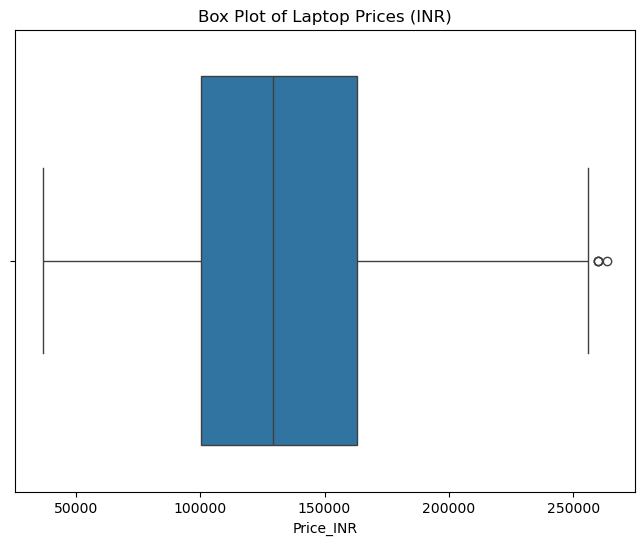

In [49]:
# Box plot for outliers in Price_INR
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price_INR'])
plt.title('Box Plot of Laptop Prices (INR)')
plt.xlabel('Price_INR')
plt.show()

In [50]:
# Detect outliers using IQR and display only those rows
Q1 = data['Price_INR'].quantile(0.25)
Q3 = data['Price_INR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_rows = data[(data['Price_INR'] < lower_bound) | (data['Price_INR'] > upper_bound)]
outlier_rows

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_INR
101,Apple,Intel i7,16,1024,macOS,NVIDIA RTX 3050,4.1,260055.6616
598,Apple,Intel i7,32,1024,macOS,Integrated,4.5,263439.5390
617,Apple,AMD Ryzen 7,32,1024,macOS,Integrated,5.0,260105.6786
865,HP,Intel i7,32,1024,macOS,NVIDIA RTX 3050,3.1,259960.1746


In [51]:
# remove the outliers from the data
data= data[(data['Price_INR'] >= lower_bound) & (data['Price_INR'] <= upper_bound)]
data

,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_INR
0,MSI,AMD Ryzen 3,4,512,macOS,AMD Radeon,4.2,99310.1176
1,Lenovo,Intel i7,32,128,macOS,NVIDIA GTX 1650,3.1,175954.3496
2,Asus,AMD Ryzen 7,8,256,Windows 10,Integrated,3.6,69010.7284
3,Dell,Intel i7,16,512,Windows 11,AMD Radeon,3.6,130124.2272
4,MSI,AMD Ryzen 7,8,512,Windows 11,NVIDIA RTX 3050,3.8,132569.6038
...,...,...,...,...,...,...,...,...
995,Dell,Intel i5,8,1024,Windows 10,NVIDIA GTX 1650,3.7,154646.1982
996,Apple,AMD Ryzen 5,8,256,Windows 10,NVIDIA GTX 1650,3.1,139580.1684
997,Apple,AMD Ryzen 5,32,512,Windows 10,Integrated,3.6,191076.7622
998,Dell,AMD Ryzen 5,32,128,Windows 11,Integrated,3.3,117222.5694


In [53]:
# display all the count of unique values in brand, processor, os, gpu
print(data['Brand'].value_counts())
print(data['Processor'].value_counts())
print(data['Operating_System'].value_counts())
print(data['GPU'].value_counts())

Brand
Apple     154
MSI       149
Asus      144
Dell      144
Acer      142
HP        132
Lenovo    131
Name: count, dtype: int64
Processor
AMD Ryzen 7    182
Intel i5       176
AMD Ryzen 5    173
AMD Ryzen 3    158
Intel i7       157
Intel i3       150
Name: count, dtype: int64
Operating_System
Windows 11    345
Windows 10    326
macOS         325
Name: count, dtype: int64
GPU
Integrated         277
AMD Radeon         268
NVIDIA RTX 3050    244
NVIDIA GTX 1650    207
Name: count, dtype: int64


In [54]:
# combine windows 11 and 10 to windows only
data['Operating_System'] = data['Operating_System'].replace({'Windows 11': 'Windows', 'Windows 10': 'Windows'})
data['Operating_System'].value_counts()

Operating_System
Windows    671
macOS      325
Name: count, dtype: int64

In [58]:
# i3, i5, i7 to 1,2,3 respectively
# Ryzen 3,5,7 to 1,2,3 respectively
data['Processor'] = data['Processor'].replace({'Intel i3': 1,
                                               'Intel i5': 2,
                                               'Intel i7': 3,
                                               'AMD Ryzen 3': 1,
                                               'AMD Ryzen 5': 2,
                                               'AMD Ryzen 7': 3})
data

C:\Windows\Temp\ipykernel_10696\2495786804.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Processor'] = data['Processor'].replace({'Intel i3': 1,


,Brand,Processor,RAM_GB,Storage_GB,Operating_System,GPU,Rating,Price_INR
0,MSI,1,4,512,macOS,AMD Radeon,4.2,99310.1176
1,Lenovo,3,32,128,macOS,NVIDIA GTX 1650,3.1,175954.3496
2,Asus,3,8,256,Windows,Integrated,3.6,69010.7284
3,Dell,3,16,512,Windows,AMD Radeon,3.6,130124.2272
4,MSI,3,8,512,Windows,NVIDIA RTX 3050,3.8,132569.6038
...,...,...,...,...,...,...,...,...
995,Dell,2,8,1024,Windows,NVIDIA GTX 1650,3.7,154646.1982
996,Apple,2,8,256,Windows,NVIDIA GTX 1650,3.1,139580.1684
997,Apple,2,32,512,Windows,Integrated,3.6,191076.7622
998,Dell,2,32,128,Windows,Integrated,3.3,117222.5694
